In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
%matplotlib inline 

In [2]:
sc.settings.verbosity = 3             
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

/Users/yoshiharamasaharu/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.23.5 scipy==1.9.1 pandas==2.0.0 scikit-learn==1.2.2 statsmodels==0.13.5 pynndescent==0.5.9


In [3]:
results_file = 'write/Tsuji_GSE213925_Analysis.h5ad'

In [4]:
adata = sc.read_h5ad('write/Tsuji_GSE213925_QC.h5ad')  

In [5]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


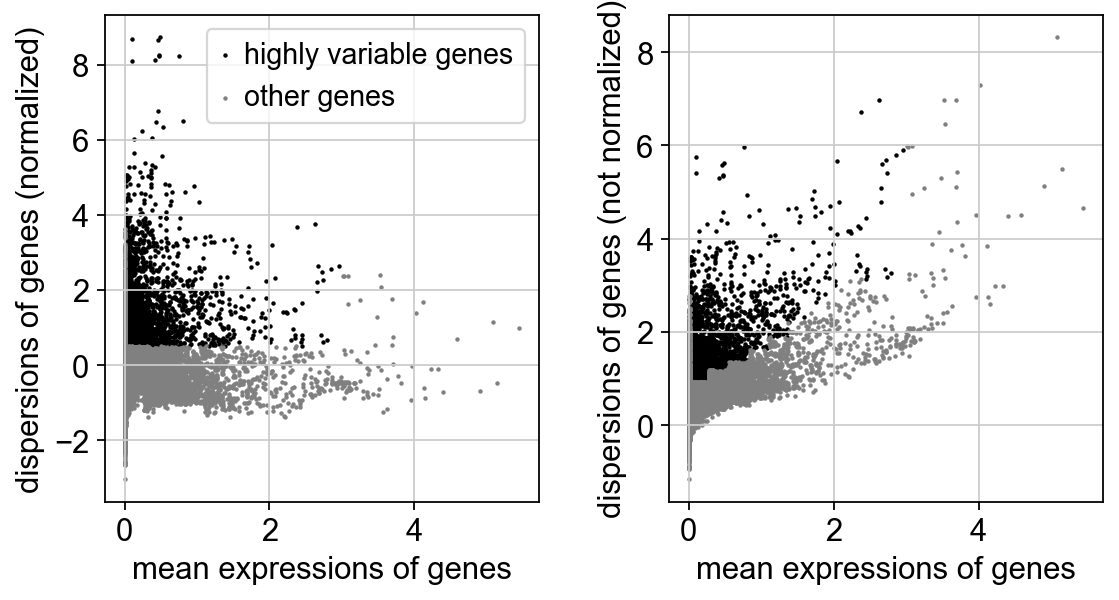

In [6]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

In [7]:
adata.raw = adata

In [8]:
adata = adata[:, adata.var.highly_variable]

In [9]:
adata

View of AnnData object with n_obs × n_vars = 3484 × 3277
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_Hbb', 'pct_counts_Hbb', 'n_genes'
    var: 'gene_ids', 'feature_types', 'mt', 'Hbb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [10]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt', 'pct_counts_Hbb'])

regressing out ['total_counts', 'pct_counts_mt', 'pct_counts_Hbb']
    sparse input is densified and may lead to high memory use
    finished (0:00:06)


In [11]:
sc.pp.scale(adata, max_value=10)

In [12]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)


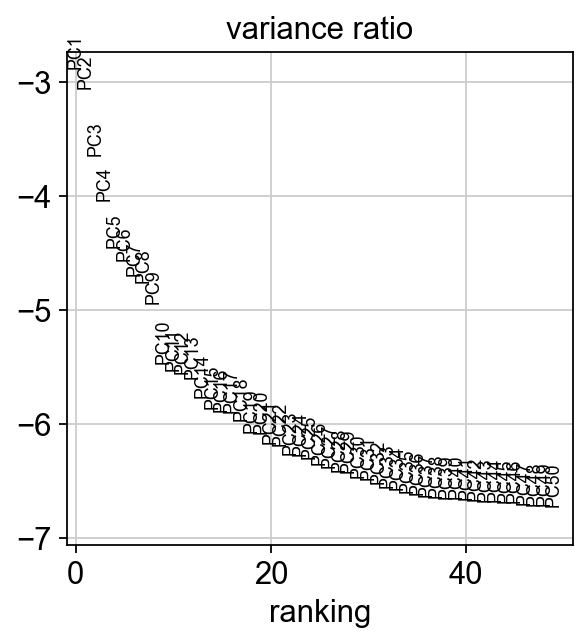

In [13]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=50)

In [14]:
adata.write(results_file)
adata

AnnData object with n_obs × n_vars = 3484 × 3277
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_Hbb', 'pct_counts_Hbb', 'n_genes'
    var: 'gene_ids', 'feature_types', 'mt', 'Hbb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [15]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)


In [16]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


In [20]:
sc.tl.leiden(adata, resolution = 0.4, key_added = "leiden")

running Leiden clustering
    finished: found 17 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


/Users/yoshiharamasaharu/Library/Python/3.9/lib/python/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


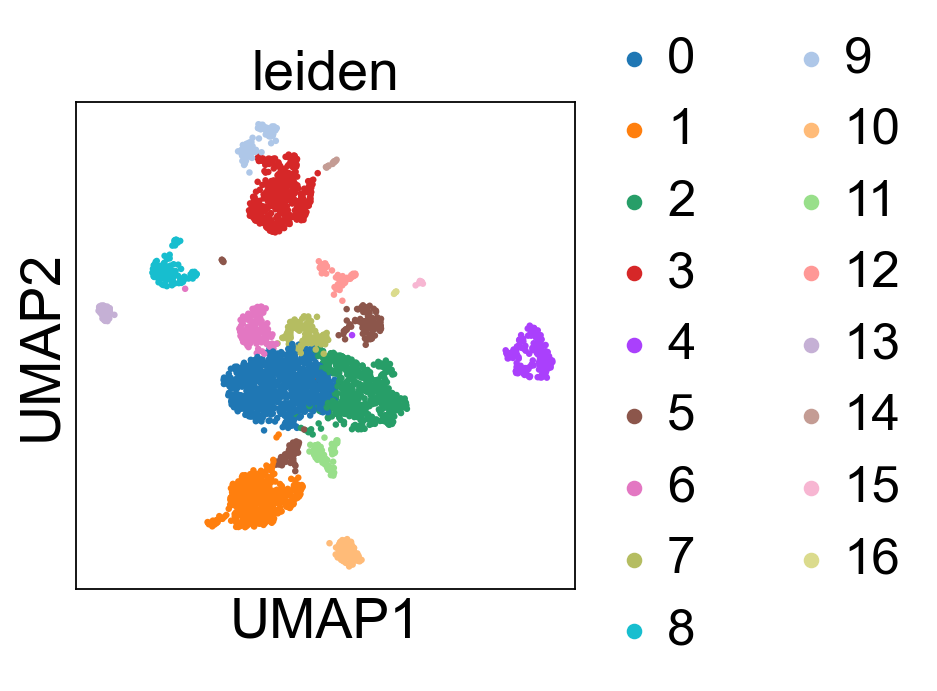

In [21]:
sc.set_figure_params(scanpy=True,fontsize=25)
sc.pl.umap(adata, color='leiden')